### *Foreword -- BillyLjm*
Hey, these are my submissions for the **IBM Quantum Challenge, Fall 2020**  
All my solutions are publicly available in my GitHub repo at [/BillyLjm/IBMQuantumChallenge2020](https://github.com/BillyLjm/IBMQuantumChallenge2020)  
This notebook starts off introducing the problem, but you can jump directly to the solution at [Learning Exercise II-B](#Learning-Exercise-II-B)  

I ended up pursuring (and implementing) multiple approaches to solve this exercise:  
1. [Shooting Asteroids](#1st-Attempt:-Shooting-Asteroids): Literal implementation of the problem statement. Didn't end up working.
2. [Maximal Matching Set](#2nd-Attempt:-Maximal-Matching-Set): Tries to find matching set/vertex cover thats equal to board width
3. [Challenge-Specific Optimistaions](#3rd-Attempt:-Optimising-for-non-General-Boards) (Submitted)

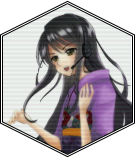

In [1]:
from IPython.display import Image, display
Image("ryoko.png", width="70")

# The Final Stage

*Dr. Ryoko is stuck in the quantum multiverse due to noise clusters interfering with her device. <br/>
Please DM Dr. Ryoko and ask her about the **noise clusters** and you will find out more. <br/>
Dr. Ryoko is trying to clear noise clusters with her laser beams, but has only 3 shots left.<br/>
To make matters worse, there seems to be one area (board) that cannot be cleared within 3 shots. <br/>
Help Dr. Ryoko identify that one area (board) with noise clusters that **cannot be cleared within 3 shots**. Good luck!<br/>*

[<< Click here to communicate with Dr. Ryoko through the web cam >>](https://youtu.be/Bkk5-j6rpoM)

*You can do this by learning how to solve a famous classic puzzle called “Asteroids puzzle”.*

# Week3: False Asteroids
Asteroids is a famous puzzle with the following setup and rules:
- The asteroids are placed on a grid.
- The objective is to destroy all the asteroids by shooting laser beams: either vertically or horizontally.
- Determine how to destroy all the asteroids by shooting no more than the specified number of beams.

The following image is an example of an Asteroids puzzle. In this example, the board size is 4 × 4 and we have six asteroids.

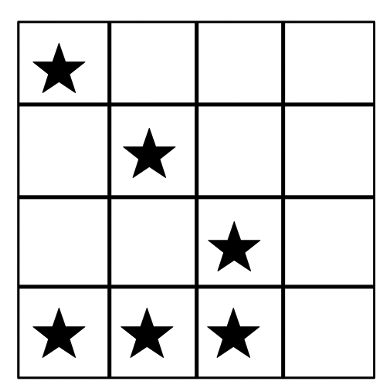

In [2]:
Image('asteroids_example.png')

As shown below, we can destroy all the asteroids by shooting 3 lasers vertically. Each thick blue line represents a laser beam. 

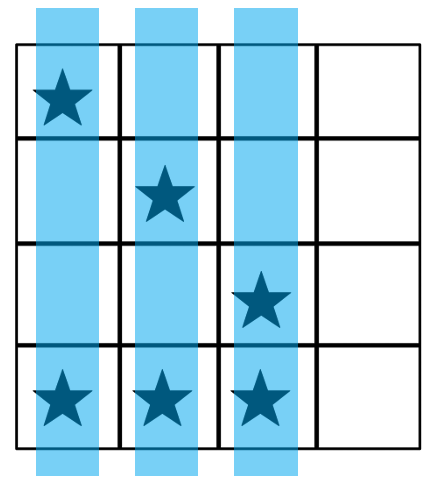

In [3]:
Image('asteroids_beam_example.png')

There are also false Asteroid problems. An Asteroid problem is false if the asteroids cannot be cleared within the specified number of beams. The following example is a false Asteroid problem with 3 laser beams.

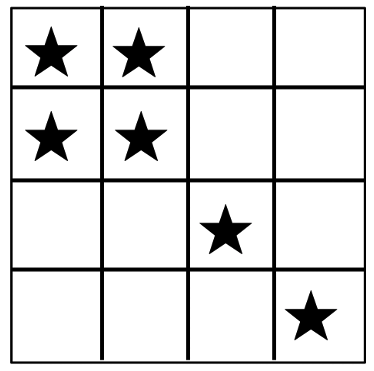

In [4]:
Image('false_asteroids_example.png')

----------
# Final Exercise
There are 16 areas (boards) that Dr. Ryoko needs to clear, each of which has 6 noise clusters that correspond to an asteroid in "Asteroids puzzle". However, there happens to be one area that cannot be cleared within three laser shots! Use Grover's algorithm you learned in Weeks 1 & 2 to find that one area (board)!

A board with asteroids is represented with a list of tuples. Each tuple represents the coordinate of an asteroid in the format `[row index, column index]`. Therefore, a board according to the following image can be represented as:

```
[['0', '0'], ['1', '1'], ['2', '2'], ['3', '0'], ['3', '1'], ['3', '2']]
```


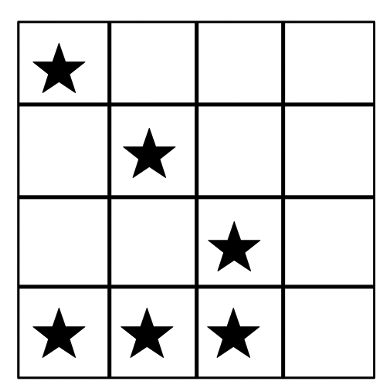

In [5]:
Image('asteroids_example.png')

There are 16 areas (boards) with the following configurations.
Find the area that cannot be cleared with 3 laser shots by using Grover's algorithm to help Dr. Ryoko!

In [6]:
problem_set = \
    [[['0', '2'], ['1', '0'], ['1', '2'], ['1', '3'], ['2', '0'], ['3', '3']],
    [['0', '0'], ['0', '1'], ['1', '2'], ['2', '2'], ['3', '0'], ['3', '3']],
    [['0', '0'], ['1', '1'], ['1', '3'], ['2', '0'], ['3', '2'], ['3', '3']],
    [['0', '0'], ['0', '1'], ['1', '1'], ['1', '3'], ['3', '2'], ['3', '3']],
    [['0', '2'], ['1', '0'], ['1', '3'], ['2', '0'], ['3', '2'], ['3', '3']],
    [['1', '1'], ['1', '2'], ['2', '0'], ['2', '1'], ['3', '1'], ['3', '3']],
    [['0', '2'], ['0', '3'], ['1', '2'], ['2', '0'], ['2', '1'], ['3', '3']],
    [['0', '0'], ['0', '3'], ['1', '2'], ['2', '2'], ['2', '3'], ['3', '0']],
    [['0', '3'], ['1', '1'], ['1', '2'], ['2', '0'], ['2', '1'], ['3', '3']],
    [['0', '0'], ['0', '1'], ['1', '3'], ['2', '1'], ['2', '3'], ['3', '0']],
    [['0', '1'], ['0', '3'], ['1', '2'], ['1', '3'], ['2', '0'], ['3', '2']],
    [['0', '0'], ['1', '3'], ['2', '0'], ['2', '1'], ['2', '3'], ['3', '1']],
    [['0', '1'], ['0', '2'], ['1', '0'], ['1', '2'], ['2', '2'], ['2', '3']],
    [['0', '3'], ['1', '0'], ['1', '3'], ['2', '1'], ['2', '2'], ['3', '0']],
    [['0', '2'], ['0', '3'], ['1', '2'], ['2', '3'], ['3', '0'], ['3', '1']],
    [['0', '1'], ['1', '0'], ['1', '2'], ['2', '2'], ['3', '0'], ['3', '1']]]

# small data set for drawing
problem_set_small = [[['0','0']], 
                     [['1','0'],['0','1']], 
                     [['0','0'],['1','0'], ['1','1']]]

Answer by creating a quantum circuit to solve the puzzle shown with the problem set above. In the quantum circuit to be submitted, measure **only the `solution` (4bit)** that solves the puzzle. <br/>
To submit your solution, create a function that takes `problem_set` as an input and then returns a  `QuantumCircuit`.  You can name the function as you like. Make sure it works even with another dataset of "problem_set". We will validate your circuit with different inputs.<br/>
Make a circuit that gets the correct answer at a low cost. The lower the cost, the better.

## <span style="color: red; ">IMPORTANT: Final exercise submission rules</span>

**For solving this problem:**<br/>
- **Please implement the quantum circuit within <span style="color: red; ">28 qubits.</span>**<br/>
- Use **Grover's algorithm** you learned in Week1 & 2 with **<span style="color: red; ">iteration ＝ 1.</span>**
- The initial state for Grover's algorithm must be equal probability distributions. For example, if you want use only 3 computational bases for 2 qubits instead of 4 as the initial state. Then, the state will be $\sqrt\frac{1}{3} (|00\rangle + |01\rangle + |11\rangle)$

- Please note that you can get the answer with the same endian as the one used in Week2 explanation. You should map the index of the problem into four classical registers *`c[0:4]`* in binary. `c[0]` is the highest bit and `c[3]` is the lowest bit. For example, when mapping 12, the furthest left bit of the `1100` will be mapped to `c[0]`.
- Make sure you **create an oracle** that **doesn't require any knowledge of what the answers are**. (For example, you are not allowed to create an oracle by using a classical optimization solver to get your answers for it.)  
- With the exception of the Unroller, which is required for decomposing your circuit to calculate quantum costs, you are not allowed to use any existing transpiler passes nor original transpilers for making simplifications in this competition.
- Please **do not run jobs in succession** even if you are concerned that your job is not running properly. This can create a long queue and clog the backend. You can check whether your job is running properly at:<br/>
https://quantum-computing.ibm.com/results  
- Your score for this exercise will be same as the cost of your QuantumCircuit. The lower the cost, the better.
- Judges will check top 10 solutions manually to see if their solutions adhere to the rules. **Please note that your ranking is subject to change after the challenge period as a result of the judging process.**
- Top 10 participants will be recognized and asked to submit a write up on how they solved the exercise.

In [7]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute

from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
pass_manager = PassManager(Unroller(['u', 'cx']))

from numpy import pi

In [8]:
def boards_params(boards):
    """Calculates parameters of the boards
    
    Paramaeters:
        boards (3D List): list of boards; a board is a list of asteroid's [x,y]
    
    Returns:
        tuple of numbers of (rows, columns, address bits, asteroids)
    """
    ncols = 0 # number of columns / maximum x coord
    nrows = 0 # number of rows / maximum y coord
    for board in boards:
        for asteroid in board:
            asteroid = [int(i) for i in asteroid]
            if asteroid[0] > ncols:
                ncols = asteroid[0]
            if asteroid[1] > nrows:
                nrows = asteroid[1]
    ncols += 1
    nrows += 1
    naddr = len(bin(len(boards)-1)[2:]) # number of address bits
    nroids = len(max(boards, key=len)) # max number of asteroids
    return (nrows, ncols, naddr, nroids)

def gray_code(n):
    """Generates the Gray code of n-bit string
    https://en.wikipedia.org/wiki/Gray_code
    
    Parameters:
        n (int): length of bit string
    
    Returns:
        list of reuslting Gray code
    """
    if n == 1:
        return ['0', '1']
    else:
        recurse = gray_code(n-1)
        out = ['0' + i  for i in recurse] + ['1' + i for i in recurse[::-1]]
    return out

OrderedDict([('u', 83), ('cx', 36)])


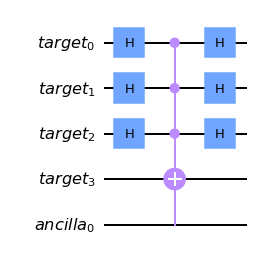

In [9]:
def diffuse(nbits, start='+'):
    """Grover diffusion circuit
    
    Parameters:
        nbits (int): number of qubits to diffuse
        start (bool): target register intial state. '0' for |0>|0>... (speed: 1 > - > 0 > +)
    
    Returns:
        QuantumCircuit for (nbits) target qubits, and (nbits-3) ancilla qubits
    """
    # declare quantum circuit
    targets = QuantumRegister(nbits, 'target')
    ancillae = QuantumRegister(nbits-3, 'ancilla') if nbits > 3 else None
    diffuse = QuantumCircuit(targets, name="Diffuse") if ancillae == None \
        else QuantumCircuit(targets, ancillae, name="Diffuse")
    
    # transfrom state to |11...1->, phase flip, and reverse tranformation
    if nbits == 1:
        qc.z(targets)
    elif start == '1':
        diffuse.h(targets[-1])
        diffuse.mcx(targets[:-1], targets[-1], ancillae, mode='v-chain')
        diffuse.h(targets[-1])
    elif start == '-':
        diffuse.h(targets[:-1])
        diffuse.mcx(targets[:-1], targets[-1], ancillae, mode='v-chain')
        diffuse.h(targets[:-1])
    elif start == '0':
        diffuse.u(pi/2, pi, pi, targets[-1]) # HX gate
        diffuse.x(targets[:-1])
        diffuse.mcx(targets[:-1], targets[-1], ancillae, mode='v-chain')
        diffuse.x(targets[:-1])
        diffuse.u(pi/2, 0, 0, targets[-1]) # XH gate
    elif start == '+':
        diffuse.u(pi/2, 0, 0, targets[:-1]) # XH gate
        diffuse.z(targets[-1])
        diffuse.mcx(targets[:-1], targets[-1], ancillae, mode='v-chain')
        diffuse.z(targets[-1])
        diffuse.u(pi/2, pi, pi, targets[:-1]) # HX gate

    return diffuse

# calculate score contribution
qc = diffuse(8, start="-")
print(pass_manager.run(qc).count_ops())

# draw circuit
qc = diffuse(4, start="-")
qc.draw(output="mpl")

OrderedDict([('u', 150), ('cx', 76)])


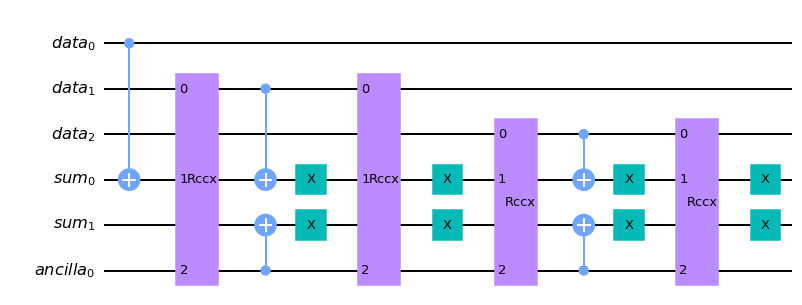

In [10]:
def adder(nbits, clean_ancillae=True):
    """ Counts the number of 1's in a register 
    into another sum register in binary form
    
    Parameters:
        nbits (int): number of input bits to add
        
    Returns:
        QuantumCircuit for (nbits) data qubits, (nsum) sum qubits, 
        and (nsum-1) ancilla qubits; where nsum = len(bin(nbits))-2
    """
    # declare variables
    nsum = len(bin(nbits)[2:])
    
    # declare quantum circuit
    data = QuantumRegister(nbits, 'data')
    summ = QuantumRegister(nsum, 'sum')
    ancillae = QuantumRegister(nsum-1, 'ancilla') if nsum > 1 else None
    adder = QuantumCircuit(data, summ, name='adder') if ancillae == None else \
         QuantumCircuit(data, summ, ancillae, name='adder')
    
    # add 1st bit
    adder.cx(data[0], summ[0])
    # add subsequent qubits
    for i in range(1, nbits):
        # mark where carry-over occurs w/ ancillae
        adder.rccx(data[i], summ[0], ancillae[0])
        for j in range(1, nsum-1):
            adder.rccx(summ[j], ancillae[j-1], ancillae[j])
        # execute carry-over onto sum register
        for j in range(nsum-1):
            adder.cx(ancillae[j], summ[j+1])
        adder.cx(data[i], summ[0])
        # reset ancillae to |00...0>
        adder.x(summ)
        for j in reversed(range(1,nsum-1)):
            adder.rccx(summ[j], ancillae[j-1], ancillae[j])
        adder.rccx(data[i], summ[0], ancillae[0])
        adder.x(summ)
    
    return adder

# calculate score contribution
qc = adder(6)
print(pass_manager.run(qc).count_ops())

# draw circuit
qc = adder(3, clean_ancillae=True)
qc.draw(output="mpl")

OrderedDict([('u', 325), ('cx', 164)])


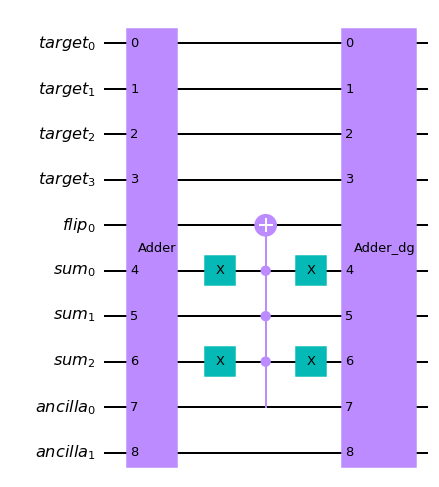

In [11]:
def oracle_eq(eqval, nbits, ancillae_init=False):
    """ Grover oracle to check if target register has a specified
    number of 1's
    
    Parameters:
        eqval (int): number of 1's to check for
        nbits (int): number of bits in target regsiter
        ancillae_init (bool): True if ancillae initalised to |-0...0>, 
                              False if ancillae intiliased to |00..0> 
    
    Returns:
        QuantumCircuit for (nbits) target resgister, and (2 * nsum) 
        ancilla qubits; where nsum = len(bin(nbits))-2
    """
    # declare variables
    assert(nbits > eqval)
    eqbin = bin(eqval)[2:][::-1] # eqval in binary, reversed
    neqbin = len(eqbin) # number of bits in binary eqval
    nsum = len(bin(nbits))-2 # number of bits in binary nbits
    
    # declare subcircuits
    add = adder(nbits).to_instruction()
    
    # declare quantum circit
    target = QuantumRegister(nbits, 'target')
    flip = QuantumRegister(1, 'flip')
    summ = QuantumRegister(nsum, 'sum')
    ancillae = QuantumRegister(nsum-1, 'ancilla')
    oracle = QuantumCircuit(target, flip, summ, ancillae, name="oracle_eq%d" % eqval)

    # check the number of 1's, and select desired number
    oracle.append(add, [*target, *summ, *ancillae])
    for i in range(neqbin):
        oracle.x(summ[i]) if eqbin[i] == '0' else None
    oracle.x(summ[neqbin:]) if neqbin < nsum else None
    
    # phase flip
    oracle.u(pi/2, pi, pi, flip) if not ancillae_init else None # HX gate
    oracle.mcx(summ, flip, ancillae, mode='v-chain')
    oracle.u(pi/2, 0, 0, flip) if not ancillae_init else None # XH gate
    
    # uncompute adder
    oracle.x(summ[neqbin:]) if neqbin < nsum else None
    for i in range(neqbin):
        oracle.x(summ[i]) if eqbin[i] == '0' else None
    oracle.append(add.inverse(), [*target, *summ, *ancillae])
    
    return oracle

# calculate score contribution
qc = oracle_eq(4, 6, ancillae_init=True)
print(pass_manager.run(qc).count_ops())

# draw circuit
qc = oracle_eq(2, 4, ancillae_init=True)
qc.draw(output="mpl")

## 1st Attempt: Shooting Asteroids  
This implmenetation takes a superposition of rows/cols to shoot, and bit flips the asteroids that are destroyed.  
It then uses 2 oracle: one to check if all asteroids are not destroyed, and another to check if there are 3 rows/cols shot  
The 2 oracles were then applied in different orders and with different number of iterations, similar to ex2b.  

This method would theoratically identify non-solutions with exactly 3 rows/cols shot.  
However, these also include the undesired addresses with rows/cols permutations that didn't destroy the asteroids either.  
Thus, it is unable to uniquely identify the false asteroids solution, and has the desired address may still emerge from the noise.  

This was exactly what happened when applied on the given `problem_set` .   
It identified a whole bunch of non-solutions that had 3 row/cols shot, but did not yield the desired address in the end.  
Thus, it was eventually abadoned in favour of an alternate implementation below, which recasts the problem to unique identify the desired address.  

OrderedDict([('u', 5516), ('cx', 2880)])


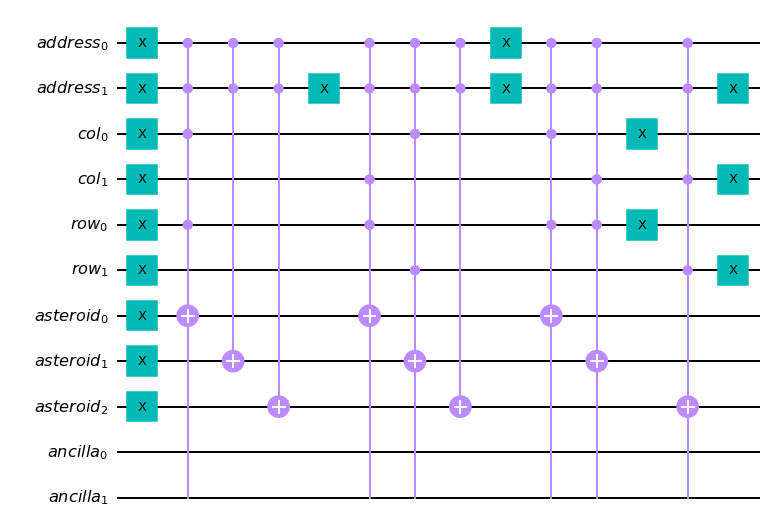

In [12]:
def shoot_asteroids(boards, shoot_val=1, roids_reverse=False):
    """Apply register of rows/columns to shoot onto register of asteroids
    
    Parameters:
        boards (3D List): list of boards; a board is a list of asteroid's [x,y]
        shoot_val (0 or 1): rows/cols register value to denote it should be shot (0 is faster)
        roid_reverse (bool): False if asteroid bit should be flipped on destruction
                             True if it should be flipped on survival (True is faster)
        
    Returns:
        QuantumCircuit for (naddr) address, (ncols) column, (nrows) row & 
        (nroids) asteroid registers, sized based on input boards. It also 
        requires (naddr) ancilla bits.
    """
    # declare variables
    nrows, ncols, naddr, nroids = boards_params(boards)
    gray = gray_code(naddr)
    
    # declare quantum circuit
    addresses = QuantumRegister(naddr, 'address') # address of asteroid boards
    cols = QuantumRegister(ncols, 'col') # to shoot col or not
    rows = QuantumRegister(nrows, 'row') # to shoot row or not
    asteroids = QuantumRegister(nroids, 'asteroid') # if asteroid is destroyed or not
    ancillae = QuantumRegister(naddr, 'ancilla') # for mcx gate
    shoot_asteroids = QuantumCircuit(addresses, cols, rows, asteroids, ancillae, name="shoot_asteroids")
    
    # initialise qubits
    shoot_asteroids.x([*rows, *cols]) if shoot_val != 0 else None
    shoot_asteroids.x(asteroids) if not roids_reverse else None
    
    # iterate through adresses in Gray code sequence
    for i in range(len(gray)):
        # prep address bits into |11...1>, 
        if i == 0:
            shoot_asteroids.x(addresses) 
        else:
            for j in range(naddr):
                shoot_asteroids.x(addresses[j]) if gray[i][j] != gray[i-1][j] else None
                
        # find corresponding board
        dec = int(gray[i], 2)
        if dec < len(boards):
            board = boards[dec]
        else:
            continue
            
        # shoot asteroids, conditioned on address & rows/cols
        for j in range(nroids):
            if j < len(board): 
                x, y = (int(k) for k in board[j])
                shoot_asteroids.mcx([*addresses, cols[x], rows[y]], asteroids[j], \
                                    ancillae, mode='v-chain')
            else:
                shoot_asteroids.mcx(addresses, asteroids[j], ancillae[:-2], mode='v-chain')
                
    # clean up
    shoot_asteroids.x([*rows, *cols]) if shoot_val != 0 else None
    for i in range(naddr):
        shoot_asteroids.x(addresses[i]) if gray[-1][i] == '0' else None
    
    return shoot_asteroids

# calculate score contribution
qc = shoot_asteroids(problem_set, shoot_val=1, roids_reverse=False)
print(pass_manager.run(qc).count_ops())

# draw circuit
qc = shoot_asteroids(problem_set_small, shoot_val=1, roids_reverse=False)
qc.draw(output="mpl")

OrderedDict([('u', 11148), ('cx', 5821)])


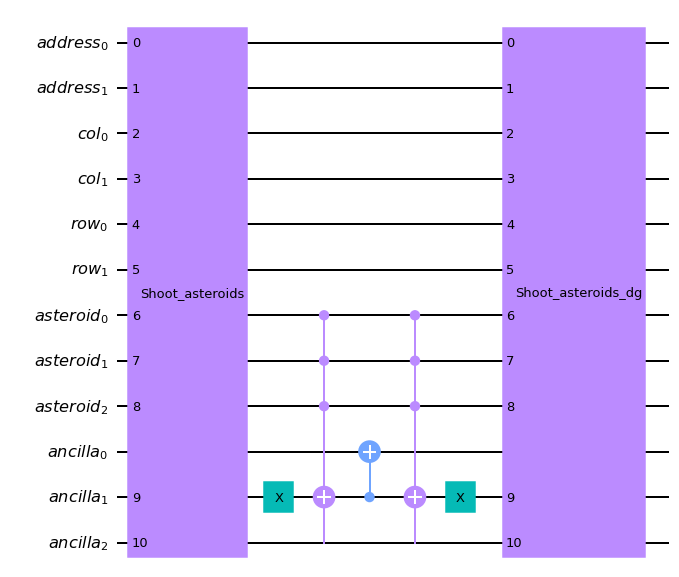

In [13]:
def oracle_roids(boards, shoot_val=1, ancillae_init=False):
    """ Grover oracle to check for non-solution to asteroids puzzle
    
    Parameters:
        boards (3D List): list of boards; a board is a list of asteroid's [x,y]
        shoot_val (0 or 1): value to denote rows/cols should be shot (0 is faster)
        ancillae_init (bool): True if ancillae initalised to |-0...0>, 
                              False if ancillae intiliased to |00..0> 
    
    Returns:
        QuantumCircuit for (naddr) address, (ncols) column, (nrows) row & 
        (nroids) asteroid registers, sized based on input boards. It also
        requires max(naddr+1, nroids) ancilla bits.
    """
    # declare variables
    nrows, ncols, naddr, nroids = boards_params(boards)
    
    # declare subcircuits
    shoot = shoot_asteroids(boards, shoot_val, roids_reverse=False)
    
    # declare qubits
    addresses = QuantumRegister(naddr, 'address') # address of asteroid boards
    cols = QuantumRegister(ncols, 'col') # to shoot col or not
    rows = QuantumRegister(nrows, 'row') # to shoot row or not
    asteroids = QuantumRegister(nroids, 'asteroid') # if asteroid is destroyed or not
    ancillae = QuantumRegister(max(naddr+1, nroids), 'ancilla')
    oracle = QuantumCircuit(addresses, cols, rows, asteroids, ancillae, name="oracle_roids")
    
    # shoot asteroids and check if any survived
    oracle.append(shoot, [*addresses, *cols, *rows, *asteroids, *ancillae[1:naddr+1]])
    oracle.x(ancillae[1])
    oracle.mcx(asteroids, ancillae[1], ancillae[2:nroids], mode='v-chain')
    
    # phase flip
    oracle.u(pi/2, pi, pi, ancillae[0]) if not ancillae_init else None # HX gate
    oracle.cx(ancillae[1], ancillae[0])
    oracle.u(pi/2, 0, 0, ancillae[0]) if not ancillae_init else None # XH gate
    
    # uncompute asteroids & ancilla
    oracle.mcx(asteroids, ancillae[1], ancillae[2:nroids], mode='v-chain')
    oracle.x(ancillae[1])
    oracle.append(shoot.inverse(), [*addresses, *cols, *rows, *asteroids, *ancillae[1:naddr+1]])
    
    return oracle

# calculate score contribution
qc = oracle_roids(problem_set, shoot_val=1, ancillae_init=True)
print(pass_manager.run(qc).count_ops())

# draw circuit
qc = oracle_roids(problem_set_small, shoot_val=1, ancillae_init=True)
qc.draw(output="mpl")

OrderedDict([('u', 11924), ('cx', 6197), ('measure', 4)])


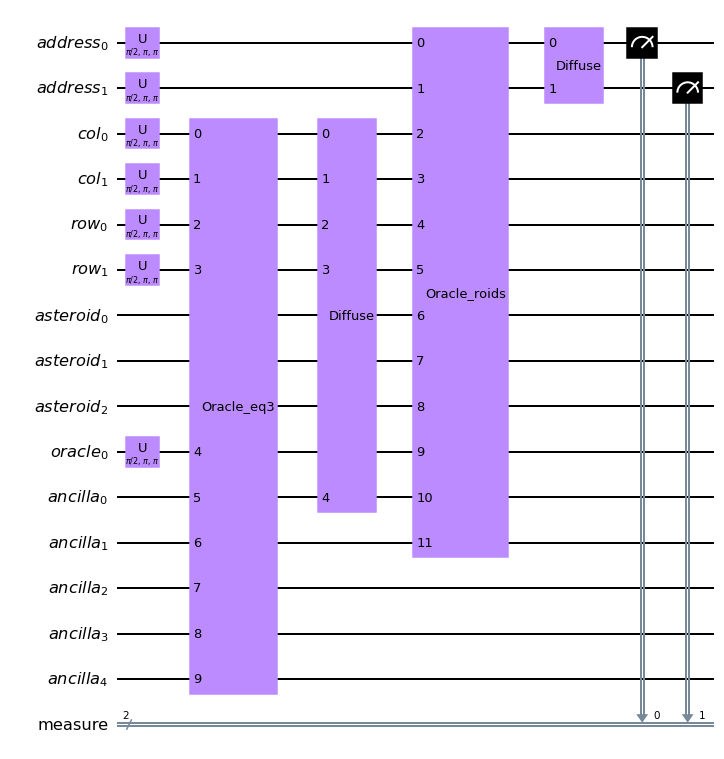

In [14]:
def week3_ans_alt(boards, niter=[1,1], grading=True):
    """ Grover search algorithm to find which lights-out puzzle
    can be solved by less than 3 switch flips 
    
    Parameters:
        boards (3D List): list of boards; a board is a list of asteroid's [x,y]
        niter (list): list of number of iterations of 1st & 2nd Grover search
        grading (bool): True to reverse-bits & unroll for grading
    
    Returns:
        QuantumCircuit for 2 address qubits, (nrows * ncols) lights register,
        (nrows * ncols) switches register, (nrows * ncols - 2) + 3 auxiliary 
        |0> qubits, and (nrows * ncols) classical measurement register
    """
    # variables
    nrows, ncols, naddr, nroids = boards_params(boards)
    nsum = len(bin(nrows+ncols)) - 2
    
    # subcircuits
    add = adder(nrows + ncols).to_instruction()
    ora_add = oracle_eq(3, nrows + ncols, ancillae_init=True)
    ora_ro = oracle_roids(boards, shoot_val=1, ancillae_init=True).to_instruction()
    diff_cols = diffuse(nrows + ncols, start="-").to_instruction()
    diff_addr = diffuse(naddr, start="-").to_instruction()
    
    # quantum circuit
    addresses = QuantumRegister(naddr, 'address') # address of asteroid boards
    cols = QuantumRegister(ncols, 'col') # to shoot col or not
    rows = QuantumRegister(nrows, 'row') # to shoot row or not
    asteroids = QuantumRegister(nroids, 'asteroid') # if asteroid is destroyed or not
    oracle = QuantumRegister(1, 'oracle') # for oracle phase flip
    ancillae = QuantumRegister(max(naddr, nroids-1, 2*nsum-1, nrows+ncols-3), 'ancilla')
    measure = ClassicalRegister(naddr, 'measure') # to measure address into
    ex3 = QuantumCircuit(addresses, cols, rows, asteroids, oracle, ancillae, measure)

    # initialise qubits
    ex3.u(pi/2, pi, pi, addresses) # |->, start='-' in diffuse
    ex3.u(pi/2, pi, pi, [*cols, *rows])
    ex3.u(pi/2, pi, pi, oracle) # for oracle phase flips
    
    # Grover algorithm to search for solutions
    for _ in range(niter[0]):
        ex3.append(ora_add, [*cols, *rows, oracle, *ancillae[:2*nsum-1]])
        ex3.append(diff_cols, [*cols, *rows, *ancillae[:max(nrows+ncols-3,0)]])

    # Grover algorithm to search for only 3 1's
    for _ in range(niter[1]):
        ex3.append(ora_ro, [*addresses, *cols, *rows, *asteroids, oracle, \
                            *ancillae[:max(naddr, nroids-1)]])
        ex3.append(diff_addr, [*addresses, *ancillae[:max(naddr-3,0)]])
        
    # output
    ex3.measure(addresses, measure)
    if grading: # optimisation
        ex3 = ex3.reverse_bits()
        ex3 = PassManager(Unroller(['u', 'cx'])).run(ex3)
    return ex3

# calculate score contribution
qc = week3_ans_alt(problem_set, niter=[1,1], grading=True)
print(pass_manager.run(qc).count_ops())

# draw circuit
qc = week3_ans_alt(problem_set_small, niter=[1,1], grading=False)
qc.draw(output="mpl", fold=50)

## 2nd Attempt: Maximal Matching Set
This implementation uses the [Vertex Cover](https://wikipedia.org/wiki/Vertex_cover) mapping & [Kőnig's theorem](https://wikipedia.org/wiki/K%C5%91nig%27s_theorem_(graph_theory)) to uniquely identify the desired address.  
It attempts to find a matching set of size identical to the number of rows (or cols) of the board.  
If such a matching set is found, the asteroids can only be destroyed by shooting all the rows (or cols).  

Here, we use a first grover search to pick out a number of asteroids *(edges)* equal to the number of rows *(vertices)* .  
A second grover search then checks if these selected asteroids *(edges)* covers all the rows and columns *(vertices)* .  
If true, the board has a maximum matching and vertex cover equal to its width, and thus fufills the false asteroid criteria.  

OrderedDict([('u', 2230), ('cx', 1152)])


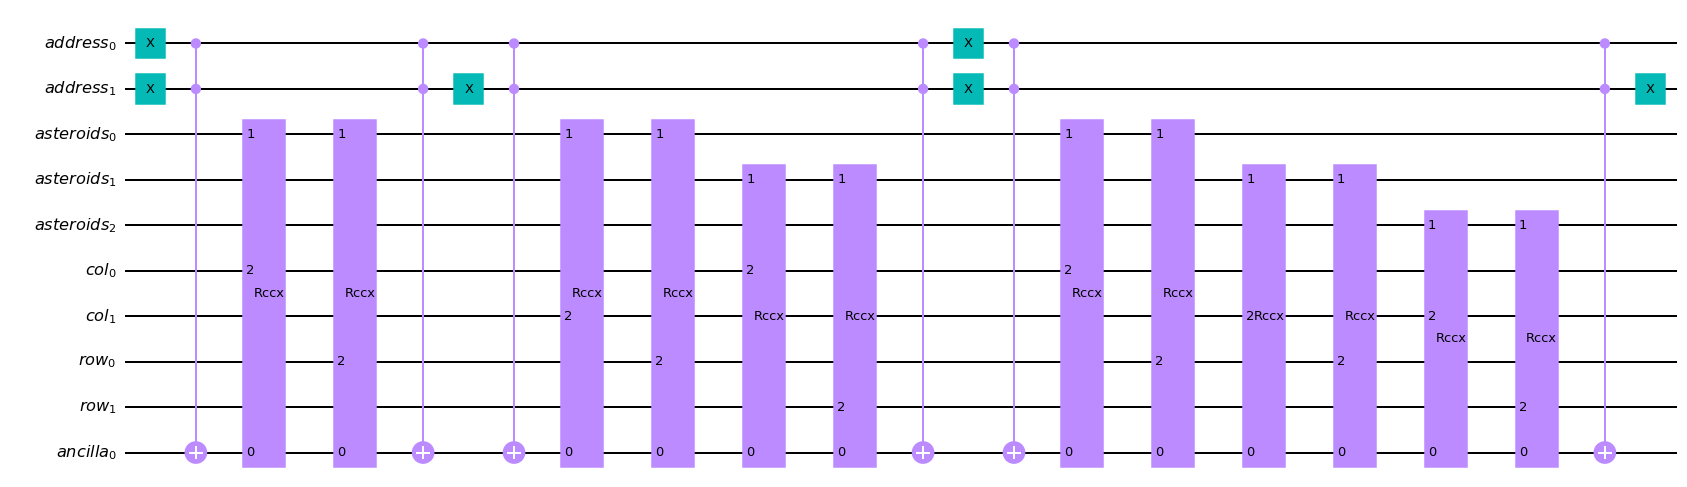

In [15]:
def rowcol_parity(boards):
    """Marks if each row/col has an odd/even number of selected asteroids
    odd parities will be bit-flipped, even parities will remain the same
    
    Parameters:
        boards (3D List): list of boards; a board is a list of asteroid's [x,y]
        
    Returns:
        QuantumCircuit for (naddr) address, (nroids) asteroid selection, (ncols) 
        column, and (nrows) row registers, sized based on input boards. It also 
        requires (naddr-1) ancilla bits.
    """
    # declare variables
    nrows, ncols, naddr, nroids = boards_params(boards)
    gray = gray_code(naddr)
    
    # declare quantum circuit
    addresses = QuantumRegister(naddr, 'address') # address of asteroid boards
    asteroids = QuantumRegister(nroids, 'asteroids') # to denote if asteroid should be included
    cols = QuantumRegister(ncols, 'col') # to store cols parities
    rows = QuantumRegister(nrows, 'row') # to shoot rows parities
    ancillae = QuantumRegister(naddr-1, 'ancilla') if naddr > 1 else None# for mcx gate
    rowcol_parity = QuantumCircuit(addresses, asteroids, cols, rows, ancillae, name="rowcol_parity") \
        if ancillae != None else QuantumCircuit(addresses, asteroids, cols, rows, name="rowcol_parity")

    # iterate through adresses in Gray code sequence
    for i in range(len(gray)):
        # prep address bits into |11...1>, 
        if i == 0:
            rowcol_parity.x(addresses) 
        else:
            for j in range(naddr):
                rowcol_parity.x(addresses[j]) if gray[i][j] != gray[i-1][j] else None
                
        # find corresponding board
        dec = int(gray[i], 2)
        if dec < len(boards):
            board = boards[dec]
        else:
            continue
            
        # flip parity of row/col for each connected asteroid
        rowcol_parity.mcx(addresses, ancillae[0], ancillae[1:], mode='v-chain')
        for j in range(len(board)):
            rowcol_parity.rccx(ancillae[0], asteroids[j], cols[int(board[j][0])])
            rowcol_parity.rccx(ancillae[0], asteroids[j], rows[int(board[j][1])])
        rowcol_parity.mcx(addresses, ancillae[0], ancillae[1:], mode='v-chain')
                
    # clean up addresses
    for i in range(naddr):
        rowcol_parity.x(addresses[i]) if gray[-1][i] == '0' else None
    
    return rowcol_parity

# calculate score contribution
qc = rowcol_parity(problem_set)
print(pass_manager.run(qc).count_ops())

# draw circuit
qc = rowcol_parity(problem_set_small)
qc.draw(output="mpl", fold=50)

OrderedDict([('u', 4959), ('cx', 2546), ('measure', 4)])


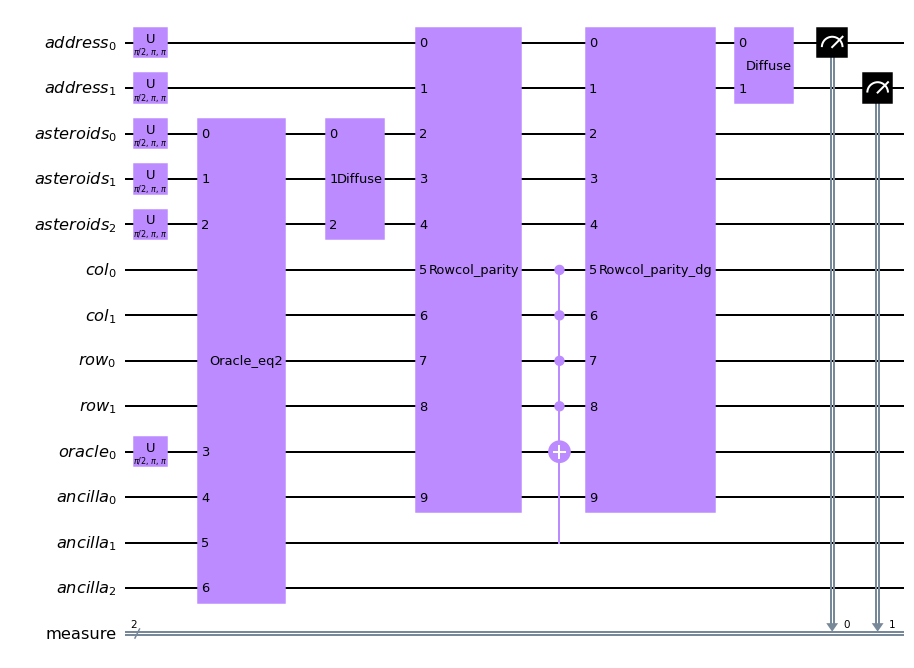

In [16]:
def week3_ans_func(boards, niter=[1,1]):
    """ Grover search algorithm to find which lights-out puzzle
    can be solved by less than 3 switch flips 
    
    Parameters:
        boards (3D List): list of boards; a board is a list of asteroid's [x,y]
        niter (list): list of number of iterations of 1st & 2nd Grover search
    
    Returns:
        QuantumCircuit for 2 address qubits, (nrows * ncols) lights register,
        (nrows * ncols) switches register, (nrows * ncols - 2) + 3 auxiliary 
        |0> qubits, and (nrows * ncols) classical measurement register
    """
    # variables
    nrows, ncols, naddr, nroids = boards_params(boards)
    nrows = max(nrows, ncols) # auto assume board is square
    ncols = nrows
    assert(nroids > ncols)
    len_rowcol = len(bin(nrows+ncols)) - 2 # for oracle_eq() ancillae num
    len_roids = len(bin(nroids)) - 2
    
    # subcircuits
    rowcolparity = rowcol_parity(boards).to_instruction()
    ora_roid = oracle_eq(nrows, nroids, ancillae_init=True).to_instruction()
    diff_roid = diffuse(nroids, start="-").to_instruction()
    diff_addr = diffuse(naddr, start="-").to_instruction()
    
    # quantum circuit
    addresses = QuantumRegister(naddr, 'address') # address of asteroid boards
    asteroids = QuantumRegister(nroids, 'asteroids') # to select asteroids
    cols = QuantumRegister(ncols, 'col') # to get parity of connected asteroids
    rows = QuantumRegister(nrows, 'row') 
    oracle = QuantumRegister(1, 'oracle') # for oracle phase flips
    ancillae = QuantumRegister(max(naddr-1, nroids-3, 2*len_roids-1, nrows+ncols-2), 'ancilla')
    measure = ClassicalRegister(naddr, 'measure') # to measure address into
    ex3 = QuantumCircuit(addresses, asteroids, cols, rows, oracle, ancillae, measure)

    # initialise qubits
    ex3.u(pi/2, pi, pi, addresses) # |->, start='-' in diffuse
    ex3.u(pi/2, pi, pi, asteroids)
    ex3.u(pi/2, pi, pi, oracle) # for oracle phase flips
    
    # Select asteroids s.t. num asteroids = num rows/cols
    for _ in range(niter[0]):
        ex3.append(ora_roid, [*asteroids, oracle, *ancillae[:2*len_roids-1]])
        ex3.append(diff_roid, [*asteroids, *ancillae[:max(nroids-3,0)]])
        
    for _ in range(niter[1]):
        ex3.append(rowcolparity, [*addresses, *asteroids, *cols, *rows, *ancillae[:naddr-1]])
        ex3.mcx([*cols, *rows], oracle, ancillae, mode='v-chain')
        ex3.append(rowcolparity.inverse(), [*addresses, *asteroids, *cols, *rows, *ancillae[:naddr-1]])
        ex3.append(diff_addr, [*addresses, *ancillae[:max(naddr-3,0)]])
        
    # output
    ex3.measure(addresses, measure)
    return ex3

# calculate score contribution
qc = week3_ans_func(problem_set, niter=[1,1])
print(pass_manager.run(qc).count_ops())

# draw circuit
qc = week3_ans_func(problem_set_small, niter=[1,1])
qc.draw(output="mpl", fold=50)

Finding the optimal number of iterations, *(for the address Grover)* 

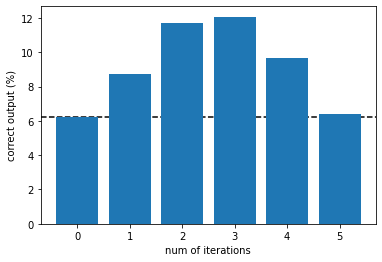

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

backend = Aer.get_backend('qasm_simulator')
niter = tuple(range(6))
num_correct = []  
shots = 10000

for i in niter:
    qc = week3_ans_func(problem_set, niter=[1,i])
    job = execute(qc, backend, shots=shots)
    answer = job.result().get_counts()['0101'] # bits are reversed
    num_correct.append(answer / shots * 100)
    
plt.bar(niter, num_correct, width=0.8)
plt.axhline(y=100/16, linestyle="--", color='k', zorder=-1)
plt.xticks(niter)
plt.xlabel('num of iterations')
plt.ylabel('correct output (%)')
plt.show()

## 3rd Attempt: Optimising for non-General Boards
Here, I optimise the solver specifically for sets of 16 different 4x4 boards w/ 6 asteroids each *(i.e. for this challenge)*

generalised:  OrderedDict([('u', 47), ('cx', 44)])
  optimised:  OrderedDict([('u', 18), ('cx', 9)])


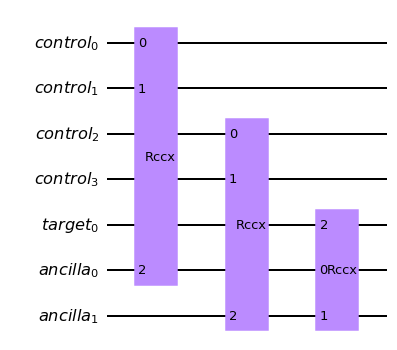

In [18]:
def mrcx4(omit=0):
    """ cost-optimised MCX for 4 control qubits
    creates dirty ancilla qubits, and uses RCCXgates
    
    Parameters:
        omit (int): to flag any unchanged qubits and omit a rccx
                    0 to omit none; 1 to omit first two; 2 to omit last two
    
    Returns:
        QuantumCircuit for 4 control, 1 target, and 2 ancilla qubtis
    """
    # declare quantum circuit
    controls = QuantumRegister(4, 'control')
    target = QuantumRegister(1, 'target')
    ancillae = QuantumRegister(2, 'ancilla')
    mcx4 = QuantumCircuit(controls, target, ancillae, name='mcx4_%d' % omit)
    
    # MCX gate
    mcx4.rccx(controls[0], controls[1], ancillae[0]) if omit != 1 else None
    mcx4.rccx(controls[2], controls[3], ancillae[1]) if omit != 2 else None
    mcx4.rccx(ancillae[0], ancillae[1], target)
    
    return mcx4

# calculate score improvement
qc = QuantumCircuit(7)
qc.mcx([0,1,2,3], 4, [5,6])
print("generalised: ", pass_manager.run(qc).count_ops())
qc = mrcx4(0)
print("  optimised: ", pass_manager.run(qc).count_ops())

qc.draw(output="mpl")

In [19]:
def rowcol_parity_opt(boards):
    """Marks if each row/col has an odd/even number of selected asteroids
    odd parities will be bit-flipped, even parities will remain the same
    Optimised for 16 boards with 4 rows, 4 cols, and 6 asteroids
    
    Parameters:
        boards (3D List): list of boards; a board is a list of asteroid's [x,y]
        
    Returns:
        QuantumCircuit for (naddr) address, (nroids) asteroid selection, (ncols) 
        column, and (nrows) row registers, sized based on input boards. It also 
        requires (naddr-1) ancilla bits.
    """
    # declare variables
    nrows, ncols, naddr, nroids = boards_params(boards)
    gray = gray_code(naddr)
    assert(naddr == 4)
    
    # declare quantum circuit
    addresses = QuantumRegister(naddr, 'address') # address of asteroid boards
    asteroids = QuantumRegister(nroids, 'asteroids') # to denote if asteroid should be included
    cols = QuantumRegister(ncols, 'col') # to store cols parities
    rows = QuantumRegister(nrows, 'row') # to shoot rows parities
    ancillae = QuantumRegister(naddr-1, 'ancilla') if naddr > 1 else None# for mcx gate    
    rowcol_parity = QuantumCircuit(addresses, asteroids, cols, rows, ancillae, name="rowcol_parity") \
        if ancillae != None else QuantumCircuit(addresses, asteroids, cols, rows, name="rowcol_parity")

    # iterate through adresses in Gray code sequence
    for i in range(len(gray)):
        # prep address bits into |11...1>,
        if i == 0:
            rowcol_parity.x(addresses)
        else:
            for j in range(naddr):
                rowcol_parity.x(addresses[j]) if gray[i][j] != gray[i-1][j] else None
                
        # find corresponding board
        dec = int(gray[i], 2)
        if dec < len(boards):
            board = boards[dec]
        else:
            continue
            
        # entangle address with ancilla
        if i == 0:
            rowcol_parity.append(mrcx4(0).to_instruction(), [*addresses, *ancillae[:3]])
        elif gray[i][0] != gray[i-1][0] or gray[i][1] != gray[i-1][1]:
            rowcol_parity.append(mrcx4(2).to_instruction(), [*addresses, *ancillae[:3]])
        elif gray[i][2] != gray[i-1][2] or gray[i][3] != gray[i-1][3]:
            rowcol_parity.append(mrcx4(1).to_instruction(), [*addresses, *ancillae[:3]])
        else:
            rowcol_parity.append(mrcx4(0).to_instruction(), [*addresses, *ancillae[:3]])
            
        # flip parity of row/col for each connected asteroid
        for j in range(len(board)):
            rowcol_parity.rccx(ancillae[0], asteroids[j], cols[int(board[j][0])])
            rowcol_parity.rccx(ancillae[0], asteroids[j], rows[int(board[j][1])])
        
        # unentangle ancilla
        if i == len(gray) - 1:
            rowcol_parity.append(mrcx4(0).to_instruction().inverse(), [*addresses, *ancillae[:3]])
        elif gray[i][0] != gray[i+1][0] or gray[i][1] != gray[i+1][1]:
            rowcol_parity.append(mrcx4(2).to_instruction().inverse(), [*addresses, *ancillae[:3]])
        elif gray[i][2] != gray[i+1][2] or gray[i][3] != gray[i+1][3]:
            rowcol_parity.append(mrcx4(1).to_instruction().inverse(), [*addresses, *ancillae[:3]])
        else:
            rowcol_parity.append(mrcx4(0).to_instruction().inverse(), [*addresses, *ancillae[:3]])

    # clean up addresses
    for i in range(naddr):
        rowcol_parity.x(addresses[i]) if gray[-1][i] == '0' else None
    
    return rowcol_parity

# calculate score improvement
qc = rowcol_parity(problem_set)
print("generalised: ", pass_manager.run(qc).count_ops())
qc = rowcol_parity_opt(problem_set)
print("  optimised: ", pass_manager.run(qc).count_ops())

generalised:  OrderedDict([('u', 2230), ('cx', 1152)])
  optimised:  OrderedDict([('u', 1570), ('cx', 774)])


In [20]:
def week3_ans_opt(boards, niter=[1,1]):
    """ Grover search algorithm to find which lights-out puzzle
    can be solved by less than 3 switch flips. 
    Optimised for 16 boards with 4 rows, 4 cols, and 6 asteroids
    
    Parameters:
        boards (3D List): list of boards; a board is a list of asteroid's [x,y]
        niter (list): list of number of iterations of 1st & 2nd Grover search
    
    Returns:
        QuantumCircuit for 2 address qubits, (nrows * ncols) lights register,
        (nrows * ncols) switches register, (nrows * ncols - 2) + 3 auxiliary 
        |0> qubits, and (nrows * ncols) classical measurement register
    """
    # variables
    nrows, ncols, naddr, nroids = boards_params(boards)
    nrows = max(nrows, ncols) # auto assume board is square
    ncols = nrows
    assert(nroids > ncols)
    len_rowcol = len(bin(nrows+ncols)) - 2 # for oracle_eq() ancillae num
    len_roids = len(bin(nroids)) - 2
    
    # subcircuits
    rowcolparity = rowcol_parity_opt(boards).to_instruction()
    ora_roid = oracle_eq(nrows, nroids, ancillae_init=True).to_instruction()
    diff_roid = diffuse(nroids, start="-").to_instruction()
    diff_addr = diffuse(naddr, start="-").to_instruction()
    
    # quantum circuit
    addresses = QuantumRegister(naddr, 'address') # address of asteroid boards
    asteroids = QuantumRegister(nroids, 'asteroids') # to select asteroids
    cols = QuantumRegister(ncols, 'col') # to get parity of connected asteroids
    rows = QuantumRegister(nrows, 'row') 
    oracle = QuantumRegister(1, 'oracle') # for oracle phase flips
    ancillae = QuantumRegister(max(naddr-1, nroids-3, 2*len_roids-1, nrows+ncols-2), 'ancilla')
    measure = ClassicalRegister(naddr, 'measure') # to measure address into
    ex3 = QuantumCircuit(addresses, asteroids, cols, rows, oracle, ancillae, measure)

    # initialise qubits
    ex3.u(pi/2, pi, pi, addresses) # |->, start='-' in diffuse
    ex3.u(pi/2, pi, pi, asteroids)
    ex3.u(pi/2, pi, pi, oracle) # for oracle phase flips
    
    # Select asteroids s.t. num asteroids = num rows/cols
    for _ in range(niter[0]):
        ex3.append(ora_roid, [*asteroids, oracle, *ancillae[:2*len_roids-1]])
        ex3.append(diff_roid, [*asteroids, *ancillae[:max(nroids-3,0)]])
        
    for _ in range(niter[1]):
        ex3.append(rowcolparity, [*addresses, *asteroids, *cols, *rows, *ancillae[:naddr-1]])
        ex3.mcx([*cols, *rows], oracle, ancillae, mode='v-chain')
        ex3.append(rowcolparity.inverse(), [*addresses, *asteroids, *cols, *rows, *ancillae[:naddr-1]])
        ex3.append(diff_addr, [*addresses, *ancillae[:max(naddr-3,0)]])
        
    # output
    ex3.measure(addresses, measure)
    return ex3

# calculate score improvement
qc = week3_ans_func(problem_set, niter=[1,1])
print("generalised: ", pass_manager.run(qc).count_ops())
qc = week3_ans_opt(problem_set, niter=[1,1])
print("  optimised: ", pass_manager.run(qc).count_ops())

generalised:  OrderedDict([('u', 4959), ('cx', 2546), ('measure', 4)])
  optimised:  OrderedDict([('u', 3639), ('cx', 1790), ('measure', 4)])


In [21]:
qc = rowcol_parity_opt(problem_set)
print("rowcol_parity: ", pass_manager.run(qc).count_ops())
qc = oracle_eq(4, 6, ancillae_init=True)
print("oracle_roids: ", pass_manager.run(qc).count_ops())
qc = diffuse(6, start="-")
print("diff_roids: ", pass_manager.run(qc).count_ops())
qc = diffuse(4, start="-")
print("diff_addr: ", pass_manager.run(qc).count_ops())

rowcol_parity:  OrderedDict([('u', 1570), ('cx', 774)])
oracle_roids:  OrderedDict([('u', 325), ('cx', 164)])
diff_roids:  OrderedDict([('u', 55), ('cx', 24)])
diff_addr:  OrderedDict([('u', 27), ('cx', 12)])


Finding the optimal number of iterations of the optimised algorithm, *(for the address Grover)* 

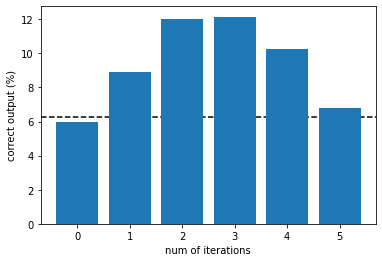

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

backend = Aer.get_backend('qasm_simulator')
niter = tuple(range(6))
num_correct = []  
shots = 10000

for i in niter:
    qc = week3_ans_opt(problem_set, niter=[1,i])
    job = execute(qc, backend, shots=shots)
    answer = job.result().get_counts()['0101'] # bits are reversed
    num_correct.append(answer / shots * 100)
    
plt.bar(niter, num_correct, width=0.8)
plt.axhline(y=100/16, linestyle="--", color='k', zorder=-1)
plt.xticks(niter)
plt.xlabel('num of iterations')
plt.ylabel('correct output (%)')
plt.show()

And that concludes the **IBM Quantum Challenge - Fall 2020**  
ε-(´・｀) ﾌ This was a really fun challenge! \\( ﾟヮﾟ)/  

Submitting my code for just 1 iteration of each Grover,  

In [23]:
# Submission code
from qc_grader import grade_ex3, prepare_ex3, submit_ex3

# Execute your circuit with following prepare_ex3() function.
# The prepare_ex3() function works like the execute() function with only QuantumCircuit as an argument.
job = prepare_ex3(week3_ans_opt)
counts = job.result().get_counts()[0]

# The bit string with the highest number of observations is treated as the solution.
counts_desc = sorted(counts.items(), key = lambda x: x[1], reverse=True)
print(counts_desc)

Running week3_ans_opt...
Computing cost...
Starting experiments. Please wait...
You may monitor the job (id: 5fc45eae1dde84001b4c9899) status and proceed to grading when it successfully completes.
[('0101', 106), ('1010', 69), ('1101', 68), ('1000', 66), ('1011', 66), ('0110', 62), ('0001', 61), ('0011', 60), ('1100', 59), ('0010', 58), ('1110', 58), ('0111', 57), ('1001', 57), ('0000', 51), ('0100', 51), ('1111', 51)]


In [24]:
# Check your answer by executing following code.
# The quantum cost of the QuantumCircuit is obtained as the score. The lower the cost, the better.
grade_ex3(job)

Grading your answer. Please wait...

Congratulations 🎉! Your answer is correct.
Your score is 21539.
The lower your score the better!
Feel free to submit your answer.


In [25]:
# Submit your results by executing following code. You can submit as many times as you like during the period. 
submit_ex3(job)

Submitting your answer. Please wait...

Success 🎉! Your answer has been submitted.
Congratulations! You have rescued Dr. Ryoko from the quantum realm. The bright "quantum future" is ahead.
